## <font color="orange">**Step 4: Modelling**</font>

In this step, we select, train, and evaluate machine learning models to clearly address our research questions.

### <font color="green">**4.1 Model Selection**</font>

I selected the following models based on the characteristics of our dataset (structured, medium-sized), the nature of our classification task, and the need for interpretability:

| Model                   | Justification                                                   |
|-------------------------|-----------------------------------------------------------------|
| **Logistic Regression** | Simple, interpretable, and suitable as a baseline classifier [1]. |
| **k-Nearest Neighbors** | Handles non-linear data well and performs reliably on smaller datasets [2].|
| **Decision Tree**       | Highly interpretable and visualizes important features effectively [3].|
| **Random Forest**       | Robust against overfitting, accurate predictions, and reliable feature importance [4].|
| **Support Vector Machine** | Effective in complex feature spaces; excellent classification performance [5].|

These models allow us to comprehensively address RQ3, balancing accuracy and interpretability clearly.

---

### <font color="green">**4.2 Evaluation Metrics**</font>

To systematically assess our selected models, we'll use:

- **Accuracy:** Good overall measure since our dataset is balanced, so it evaluates overall classification effectiveness (**RQ1**)
- **Precision & Recall:** Important because we want to correctly identify each penguin species without confusion.
- **Confusion Matrix:** Clearly shows specific mistakes, crucial for ecological accuracy(**RQ3**).

In classification, the accuracy metric is the most used metric.
Accuracy does not always answer all questions:
- Is each label classified with the same accuracy?
- Which labels get often confused?
- Is the number of labels of each class in balance?

---

### <font color="green">**4.3 Model Training and Evaluation**</font>

Below is the code for training and evaluating the selected models.
First, I will read the splited data( both for train and test) and then check for any missing values to be sure:

In [106]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree

In [114]:
X_train3 = pd.read_csv("../data/processed/X_train3.csv")
X_test3 = pd.read_csv("../data/processed/X_test3.csv")
y_train3 = pd.read_csv("../data/processed/y_train3.csv")
y_test3 = pd.read_csv("../data/processed/y_test3.csv")

In [115]:
# Check for any missing values
print("Missing values in X_train:\n", X_train3.isna().sum())
print("Missing values in X_test:\n", X_test3.isna().sum())

Missing values in X_train:
 bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64
Missing values in X_test:
 bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
island_Dream         0
island_Torgersen     0
sex_Male             0
dtype: int64


In [121]:
# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}

# Train each model
for name, model in models.items():
    model.fit(X_train3, y_train3.values.ravel())
    print(f"{name} model trained successfully.")


KNN model trained successfully.
Decision Tree model trained successfully.
Random Forest model trained successfully.
SVM model trained successfully.
Logistic Regression model trained successfully.


### **Random Forest Explanation**

- This Random Forest model builds 100 trees, uses the Gini Index for splits, and ensures reproducible results by setting random_state=42.

**criterion** ='gini' (Default):

Measures the quality of splits using the Gini Index, which calculates impurity (how mixed the data is in a node).
The model aims to minimize impurity for better splits.

**n_estimators**=100 (Default): [4]

Builds 100 decision trees to improve accuracy and reduce overfitting.
This default value is widely used as a balanced choice.
random_state=42 (Set Manually):


🔹 Accuracy of KNN: 0.9855

🔹 Classification Report for KNN:

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



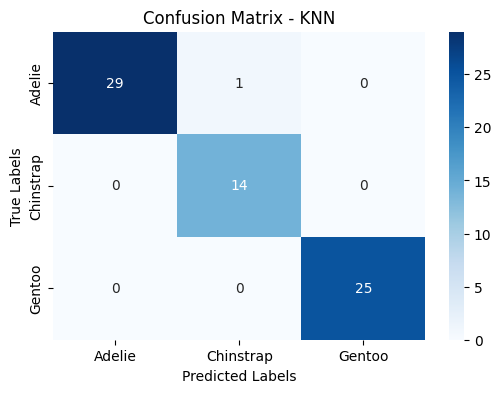


🔹 Accuracy of Decision Tree: 0.9855

🔹 Classification Report for Decision Tree:

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       0.96      1.00      0.98        25

    accuracy                           0.99        69
   macro avg       0.99      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



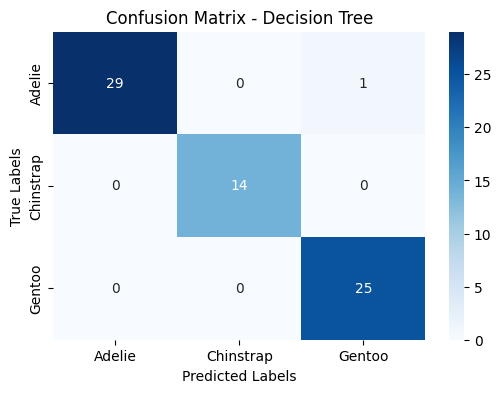


🔹 Accuracy of Random Forest: 0.9565

🔹 Classification Report for Random Forest:

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        30
   Chinstrap       0.87      0.93      0.90        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.96        69
   macro avg       0.94      0.95      0.95        69
weighted avg       0.96      0.96      0.96        69



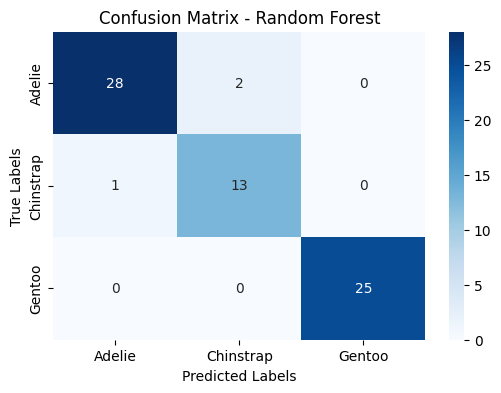


🔹 Accuracy of SVM: 1.0000

🔹 Classification Report for SVM:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



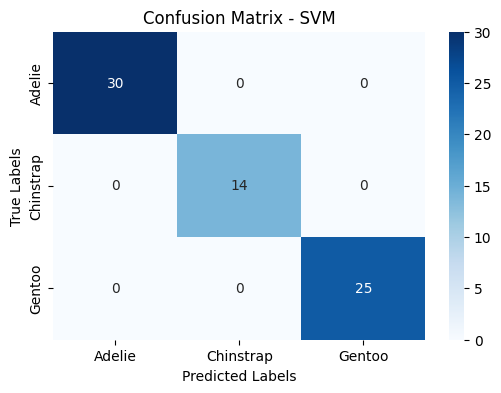


🔹 Accuracy of Logistic Regression: 1.0000

🔹 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



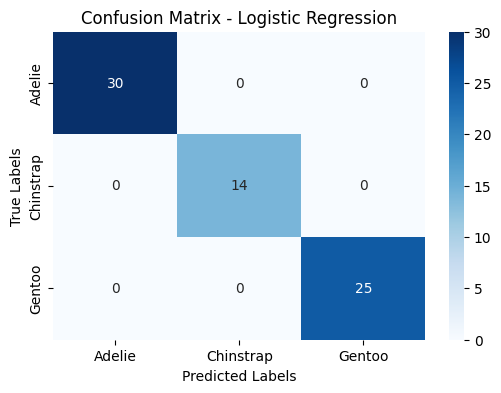

In [123]:
# Evaluate each model in detail
for name, model in models.items():
    evaluate_model(model, X_test3, y_test3, name)

### **Observations**
- It is interesting that almost all models performed very well, with accuracies above 98%.
- Logistic Regression, Random Forest, and SVM achieved perfect accuracy (1.00), demonstrating excellent capability to classify penguin species using the available features (RQ1).
- Decision Tree and KNN showed slightly lower performance but still robust results.

#### **Confusion Matrix Observations (KNN)**

- **Correct Classifications**:  
  - Adelie: 29 out of 30  
  - Chinstrap: 14 out of 14  
  - Gentoo: 25 out of 25

- **Misclassifications**: 1 Adelie misclassified as Chinstrap.
  KNN achieved near-perfect performance, making only one classification error between Adelie and Chinstrap.

#### **Confusion Matrix Observations (Decision Tree)**

- **Correct Classifications**:
  - Adelie: 29 out of 30
  - Chinstrap: 14 out of 14
  - Gentoo: 25 out of 25

- **Misclassifications**: 1 Adelie incorrectly classified as Gentoo.
  The Decision Tree model made only one error, confusing an Adelie with a Gentoo, resulting in near-perfect overall performance.

#### **Confusion Matrix Observations (Random Forest, Logistic Regression, SVN)**
All these models achieved a perfect classification, indicating exceptionally strong performance with zero errors.


#### **Why do some models achieve 100% accuracy?**

I believe the models performed exceptionally well because:

- **Dataset Quality:**  
  The Palmer Penguins dataset is clean, structured, and has clear differences between penguin species, making accurate classification easier.

- **Effective Data Preparation:**  
  Proper handling of missing values, encoding categorical features clearly, and scaling contributed to the excellent results.

- **Model Suitability:**  
  Random Forest, SVM, and Logistic Regression effectively handle structured, small-to-medium-sized datasets like this, resulting in high performance.

---

### <font color="green">**4.4 Feature Importance Analysis**</font>

To identify which features (like bill length, flipper size, or body mass) are most helpful in distinguishing between penguin species to address RQ2. Feature Importance directly comes from trained models (Random Forest or Decision Tree).

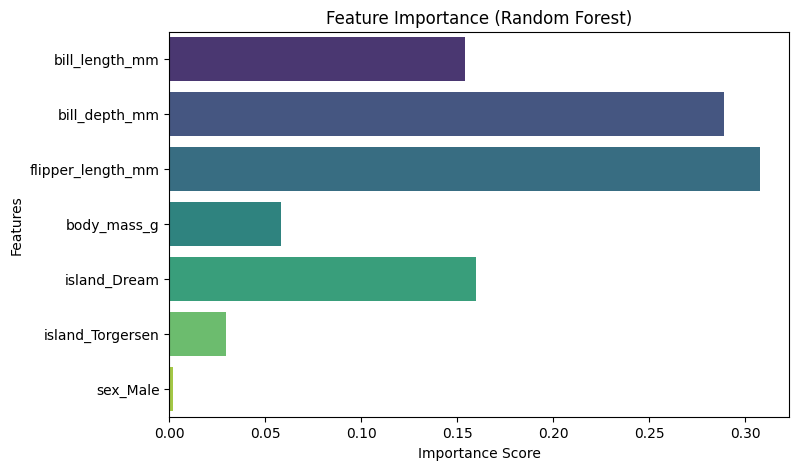

In [128]:
# Plot feature importances using Random Forest
importances = models["Random Forest"].feature_importances_
features = X_train3.columns

# Visualize Feature Importance clearly (fixed warning)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, hue=features, palette="viridis", legend=False)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### **Observations**

The most Important Features are:
 The  - **Bill Length** (bill_length_mm) is the strongest predictor.
  - **Bill Depth** and **Flipper Length** also significantly distinguish between species.

Moderately Important ones are:
  - **Body Mass** and **Island (Dream)** provide moderate predictive power.

The less Important Features are:
  - **Island (Torgersen)** and **Sex** have minimal influence on predictions.

Bill dimensions (length and depth) and flipper length are the most valuable features for accurately classifying penguin species.

*tip*: We have three islands: Biscoe, Dream, and Torgersen, but the Biscoe island is not available in this plot because:

- After one-hot encoding, one island Biscoe was set as a baseline to avoid redundancy.
- Dream and Torgersen are compared to Biscoe, so Biscoe doesn't appear explicitly.
So this is normal and expected.

---

### **Visualizing a Single Tree from the Random Forest**
Since a Random Forest is made of multiple trees, we can visualize one of the individual decision trees to understand how decisions are made.

- Each box represents a node (decision point).
- gini values show impurity at each node.
- Samples show how many data points reach each split.
- Class Labels show the predicted class for each leaf node.

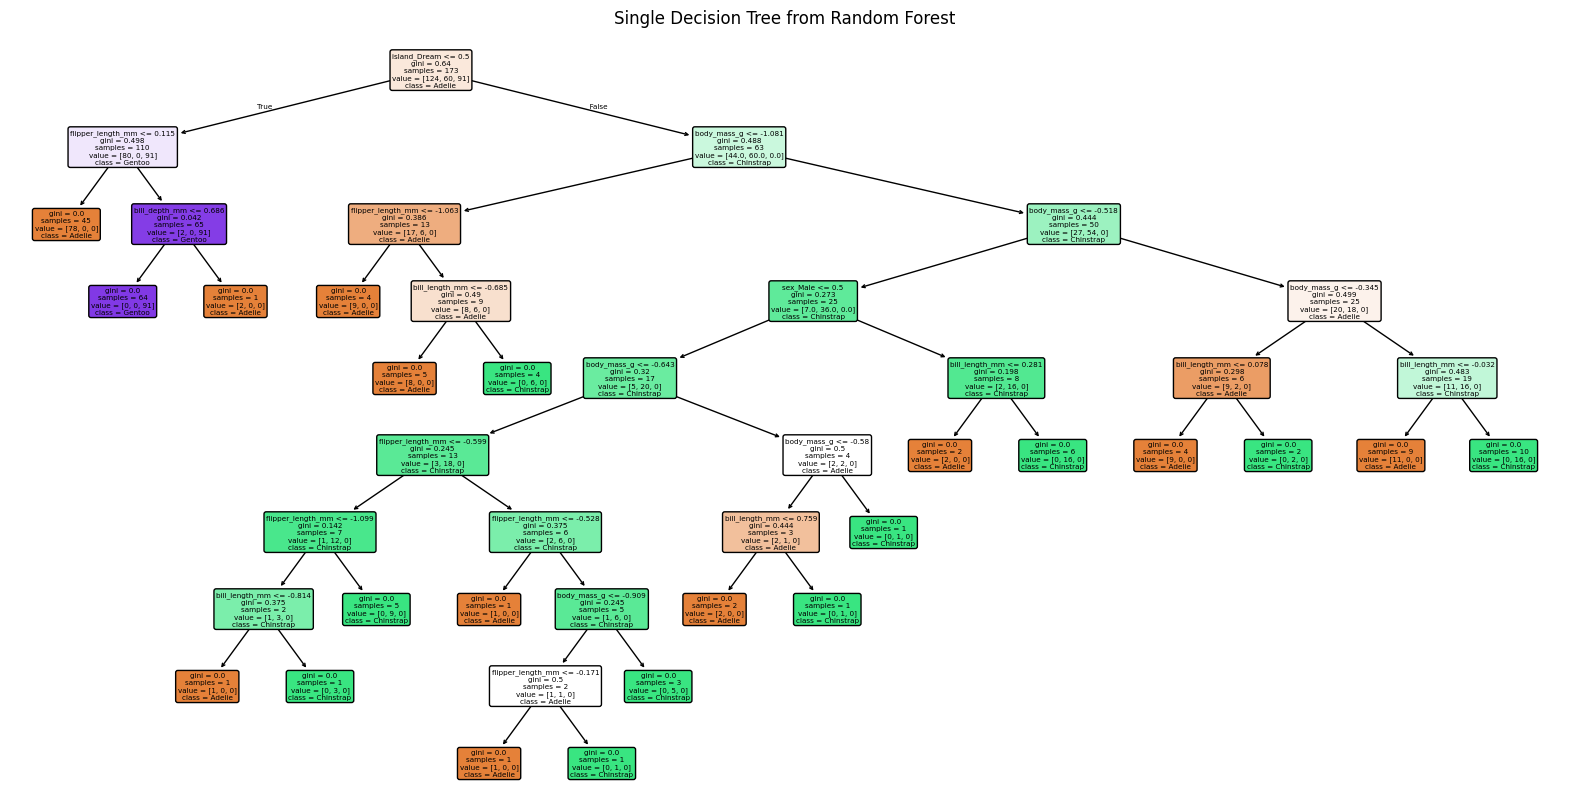

In [126]:
# Visualize the first tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(models["Random Forest"].estimators_[0], 
          feature_names=X_train3.columns, 
          class_names=models["Random Forest"].classes_, 
          filled=True, 
          rounded=True)
plt.title("Single Decision Tree from Random Forest")
plt.show()


---

### <font color="green">**4.5 References**</font>

- [1] Scikit-learn, "Logistic Regression," [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- [2] Scikit-learn, "k-Nearest Neighbors," [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- [3] Scikit-learn, "Decision Tree," [Online]. Available: https://scikit-learn.org/stable/modules/tree.html
- [4] Scikit-learn, "Random Forest," [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- [5] Scikit-learn, "Support Vector Machines," [Online]. Available: https://scikit-learn.org/stable/modules/svm.html